# Innovation or Adoption Models

In [1]:
import utils 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Read from the preprocessed data

In [2]:
df = pd.read_excel('../data/processed/cleaned_data.xlsx', sheet_name='cleaned_data')

df.tail()

,TITLE,CPC,ASIGNEE,FILING_DATE,YEAR,PATENT_NO,CATEGORY,SUB_CATEGORY,TAXONOMY_SSTT,SECTION
8038,SYSTEMS AND METHODS FOR MONITORING AUTOMATED C...,B29C70/386;G01N21/88,THE BOEING COMPANY,2006-05-16,2006,20070277919,COMPOSITE,MANUFACTURING PROCESSES/ DESIGN TOOLS/ TECHNIQUES,B12,B
8039,PORTABLE COMPOSITE BONDING INSPECTION SYSTEM,G01N21/94,"SPACE MICRO, INC.",2007-04-23,2007,20070252084,COMPOSITE,MANUFACTURING PROCESSES/ DESIGN TOOLS/ TECHNIQUES,B12,B
8040,METHODS OF DEBONDING A COMPOSITE TOOLING,B29C70/30;B29C33/505;B64F5/10,"TOYOTA MOTOR SALES U.S.A., INC.",2006-07-21,2006,20070006960,COMPOSITE,MANUFACTURING PROCESSES/ DESIGN TOOLS/ TECHNIQUES,B12,B
8041,ADHESIVE OF A SILICON AND SILICA COMPOSITE FOR...,H01L21/67306,NaN,2006-06-01,2006,20060213601,COMPOSITE,MANUFACTURING PROCESSES/ DESIGN TOOLS/ TECHNIQUES,B12,B
8042,COMPOSITE LAMINATION USING ARRAY OF PARALLEL M...,B29C70/545;B29C70/386;B29C70/202;B32B38/1808;B...,THE BOEING COMPANY,2006-03-02,2006,20060162143,COMPOSITE,MANUFACTURING PROCESSES/ DESIGN TOOLS/ TECHNIQUES,B12,B


Groupby to understand well the data distribution

In [3]:
# Group by 'YEAR' and count occurrences
grouped_df = df.groupby('YEAR').size().reset_index(name='COUNT')

# Display grouped DataFrame
grouped_df

,YEAR,COUNT
0,2006,299
1,2007,310
2,2008,298
3,2009,259
4,2010,262
5,2011,278
6,2012,279
7,2013,376
8,2014,389
9,2015,514


## S Curve

Cumulative Count for all patents

In [4]:
df['MONTH'] = df['FILING_DATE'].dt.month

In [5]:
def calculate_cumulative_count_per_month(data: pd.DataFrame):
    """
    Calculate the cumulative count of patent applications per year for all categories.

    Parameters:
    - data: DataFrame containing the patent application data

    Returns:
    - DataFrame with the cumulative count of patent applications per year for all categories
    """
    applications_per_month = data.groupby(['YEAR','MONTH']).size().reset_index(name='Applications_Per_Month')
    applications_per_month['Cumulative_Count'] = applications_per_month['Applications_Per_Month'].cumsum()
    
    return applications_per_month

In [6]:
cumulative_count = calculate_cumulative_count_per_month(df)

# Print the cumulative count of patent applications per year
cumulative_count

,YEAR,MONTH,Applications_Per_Month,Cumulative_Count
0,2006,1,24,24
1,2006,2,25,49
2,2006,3,16,65
3,2006,4,22,87
4,2006,5,31,118
...,...,...,...,...
209,2023,6,24,8012
210,2023,7,16,8028
211,2023,8,5,8033
212,2023,9,5,8038


In [7]:
def visualize_application_per_month(data: pd.DataFrame, y_axis: str):
    """
    Plot the S-curve of patent applications.

    Parameters:
    - data: DataFrame containing the cumulative count of patent applications per year
    - y_axis: Name of the column in the DataFrame to use as the y-axis data
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['YEAR'].astype(int), data[y_axis], marker='o', linestyle='-', color='b')
    plt.title('S-curve of Patent Applications')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Patent Applications')
    plt.grid(True)
    plt.show()

In [8]:
def calculate_cumulative_count(data: pd.DataFrame):
    """
    Calculate the cumulative count of patent applications per year for all categories.

    Parameters:
    - data: DataFrame containing the patent application data

    Returns:
    - DataFrame with the cumulative count of patent applications per year for all categories
    """
    applications_per_year = data.groupby('YEAR').size().reset_index(name='Applications_Per_Year')
    applications_per_year['Cumulative_Count'] = applications_per_year['Applications_Per_Year'].cumsum()
    
    return applications_per_year

cumulative_count = calculate_cumulative_count(df)

# Print the cumulative count of patent applications per year
cumulative_count

,YEAR,Applications_Per_Year,Cumulative_Count
0,2006,299,299
1,2007,310,609
2,2008,298,907
3,2009,259,1166
4,2010,262,1428
5,2011,278,1706
6,2012,279,1985
7,2013,376,2361
8,2014,389,2750
9,2015,514,3264


In [9]:
cumulative_count.dtypes

YEAR                     int64
Applications_Per_Year    int64
Cumulative_Count         int64
dtype: object

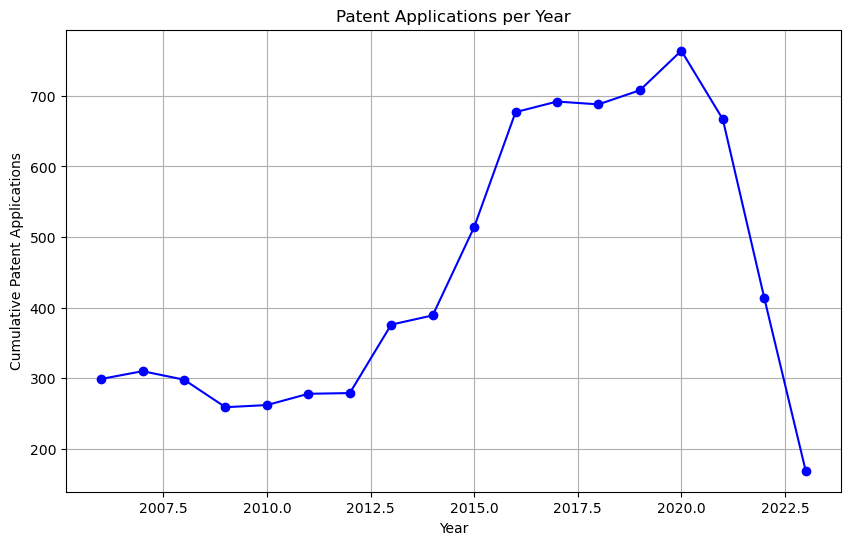

In [10]:
def visualize_application_per_year(data: pd.DataFrame, y_axis: str):
    """
    Plot the S-curve of patent applications.

    Parameters:
    - data: DataFrame containing the cumulative count of patent applications per year
    - y_axis: Name of the column in the DataFrame to use as the y-axis data
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['YEAR'].astype(int), data[y_axis], marker='o', linestyle='-', color='b')
    plt.title('Patent Applications per Year')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Patent Applications')
    plt.grid(True)
    plt.show()


visualize_application_per_year(cumulative_count, 'Applications_Per_Year')

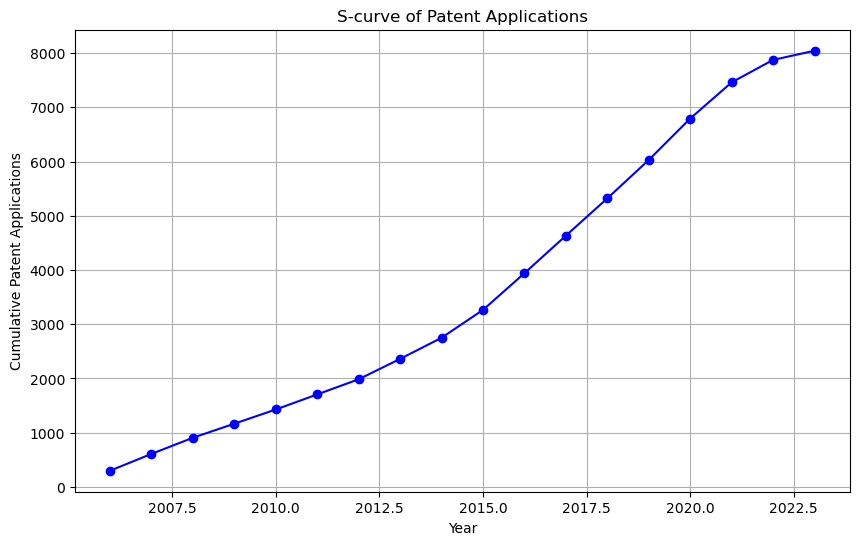

In [11]:
def plot_s_curve(data: pd.DataFrame, y_axis: str):
    """
    Plot the S-curve of patent applications.

    Parameters:
    - data: DataFrame containing the cumulative count of patent applications per year
    - y_axis: Name of the column in the DataFrame to use as the y-axis data
    """
    plt.figure(figsize=(10, 6))
    plt.plot(data['YEAR'].astype(int), data[y_axis], marker='o', linestyle='-', color='b')
    plt.title('S-curve of Patent Applications')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Patent Applications')
    plt.grid(True)
    plt.show()


plot_s_curve(cumulative_count, 'Cumulative_Count')

Calculate cumulative count per `CATEGORY`

In [12]:
categories = ['ARTIFICIAL INTELLIGENCE', 'AVIATION', 'COMPOSITE', 'LASER', 'SPACE']

# Calculate cumulative count per category making Time Series table
ts_table = utils.calculate_cumulative_count_per_category(df, categories)

In [13]:
ts_table

,YEAR,Applications_Per_Year,Cumulative_Count,CATEGORY
0,2006,118,118,ARTIFICIAL INTELLIGENCE
1,2007,117,235,ARTIFICIAL INTELLIGENCE
2,2008,95,330,ARTIFICIAL INTELLIGENCE
3,2009,86,416,ARTIFICIAL INTELLIGENCE
4,2010,86,502,ARTIFICIAL INTELLIGENCE
...,...,...,...,...
85,2019,94,972,SPACE
86,2020,100,1072,SPACE
87,2021,107,1179,SPACE
88,2022,70,1249,SPACE


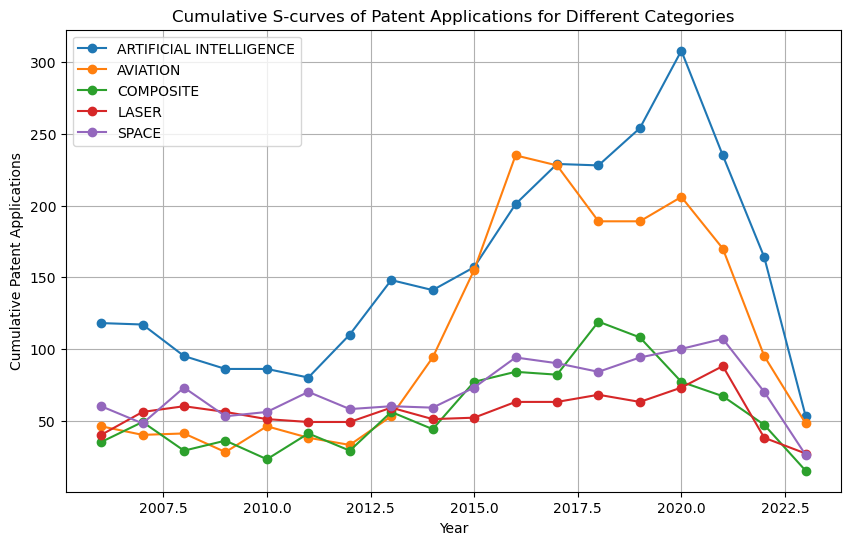

In [14]:
def visualize_application_per_year(data: pd.DataFrame):
    """
    Plot the cumulative S-curves of patent applications for different categories.

    Parameters:
    - data: DataFrame containing the cumulative count of patent applications per year for each category
    """ 
    plt.figure(figsize=(10, 6))
    categories = data['CATEGORY'].unique()

    for category in categories:
        category_data = data[data['CATEGORY'] == category]
        plt.plot(category_data['YEAR'], category_data['Applications_Per_Year'] , marker='o', linestyle='-', label=category)

    plt.title('Cumulative S-curves of Patent Applications for Different Categories')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Patent Applications')
    plt.grid(True)
    plt.legend()
    plt.show()


visualize_application_per_year(ts_table)

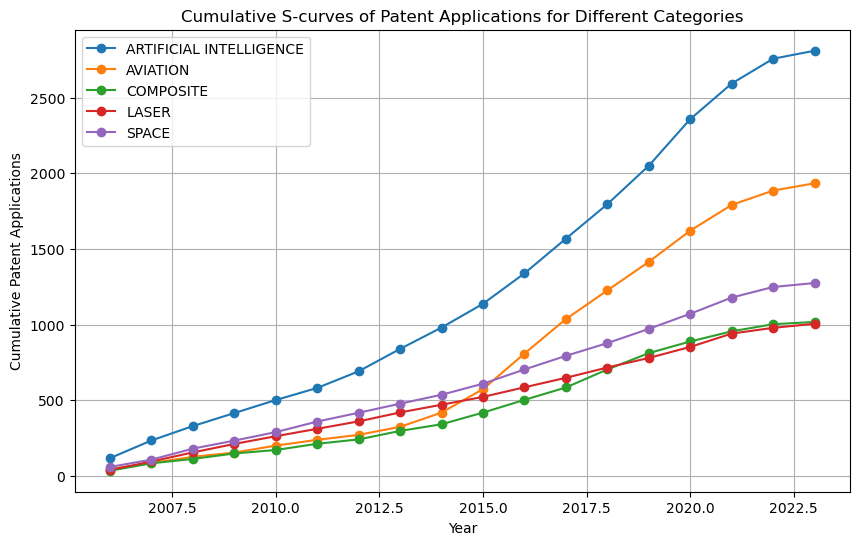

In [15]:
utils.plot_cumulative_s_curves(ts_table)

By `SECTION` feature

In [16]:
sections = ['A', 'B', 'C']

def calculate_cumulative_count_per_category(data: pd.DataFrame, categories: list):
    """
    Calculate the cumulative count of patent applications per year for each unique category.

    Parameters:
    - data: DataFrame containing the patent application data
    - categories: List of unique categories

    Returns:
    - DataFrame with the cumulative count of patent applications per year for each category
    """
    result = []
    for category in categories:
        category_data = data[data['SECTION'] == category]
        applications_per_year = category_data.groupby('YEAR').size().reset_index(name='Applications_Per_Year')
        applications_per_year['Cumulative_Count'] = applications_per_year['Applications_Per_Year'].cumsum()
        applications_per_year['SECTION'] = category
        result.append(applications_per_year)
    
    return pd.concat(result, ignore_index=True)

ts_table2 = calculate_cumulative_count_per_category(df, sections)

In [17]:
ts_table2

,YEAR,Applications_Per_Year,Cumulative_Count,SECTION
0,2006,103,103,A
1,2007,103,206,A
2,2008,99,305,A
3,2009,94,399,A
4,2010,77,476,A
5,2011,91,567,A
6,2012,100,667,A
7,2013,145,812,A
8,2014,139,951,A
9,2015,165,1116,A


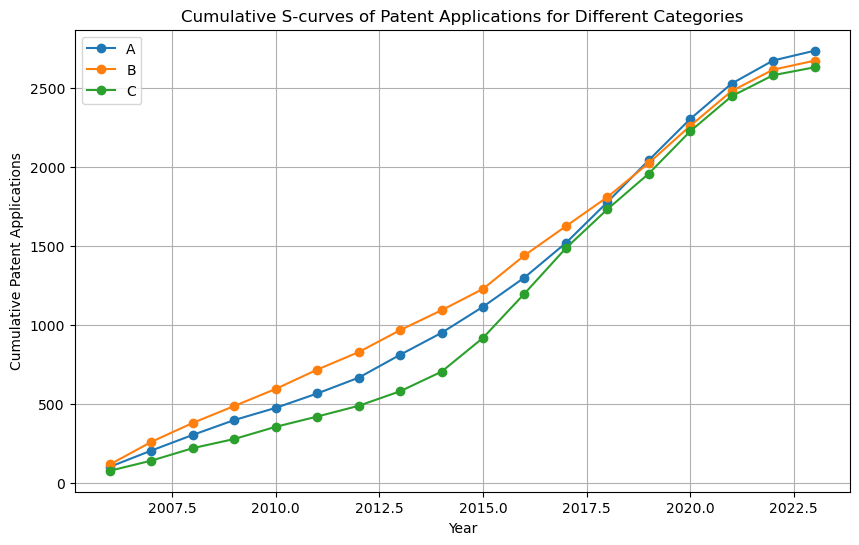

In [18]:
def plot_cumulative_s_curves(data: pd.DataFrame):
    """
    Plot the cumulative S-curves of patent applications for different categories.

    Parameters:
    - data: DataFrame containing the cumulative count of patent applications per year for each category
    """
    plt.figure(figsize=(10, 6))
    categories = data['SECTION'].unique()

    for category in categories:
        category_data = data[data['SECTION'] == category]
        plt.plot(category_data['YEAR'], category_data['Cumulative_Count'], marker='o', linestyle='-', label=category)

    plt.title('Cumulative S-curves of Patent Applications for Different Categories')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Patent Applications')
    plt.grid(True)
    plt.legend()
    plt.show()

plot_cumulative_s_curves(ts_table2)

## Logistic Growth Model

Plot logistic growth curves for each category

For category 'ARTIFICIAL INTELLIGENCE': L=3938.802772535492, k=0.2360222567473424, t0=2018.609584809502


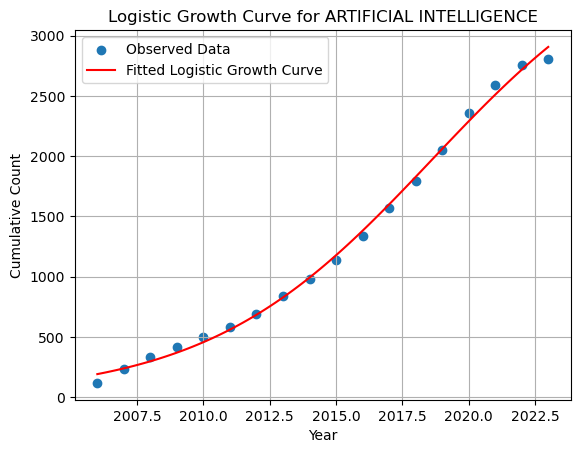

For category 'AVIATION': L=2266.6962646462453, k=0.36113528541740947, t0=2017.6022778296817


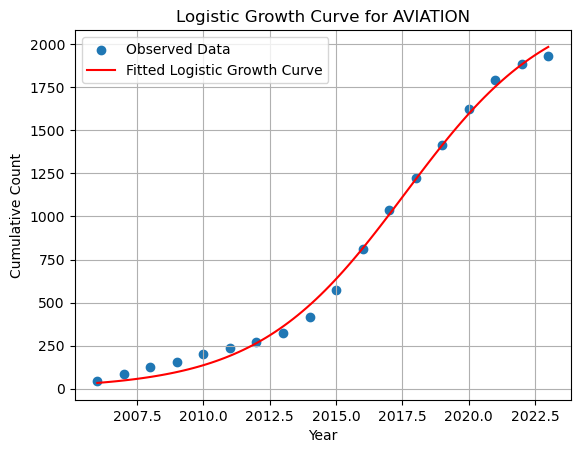

For category 'COMPOSITE': L=1291.6695078559212, k=0.26949714396164104, t0=2017.4230997429993


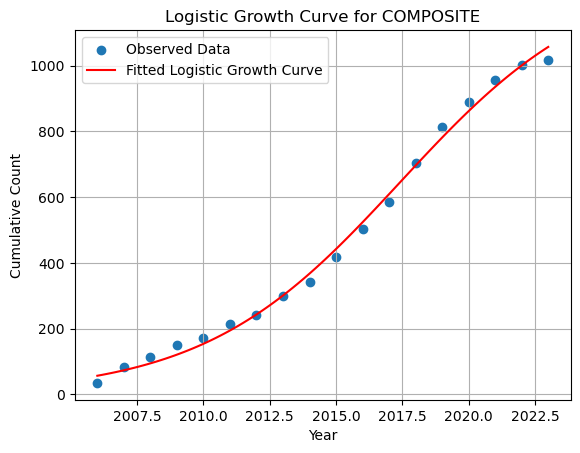

For category 'LASER': L=1223.3723935187766, k=0.22803901747009006, t0=2016.209954399316


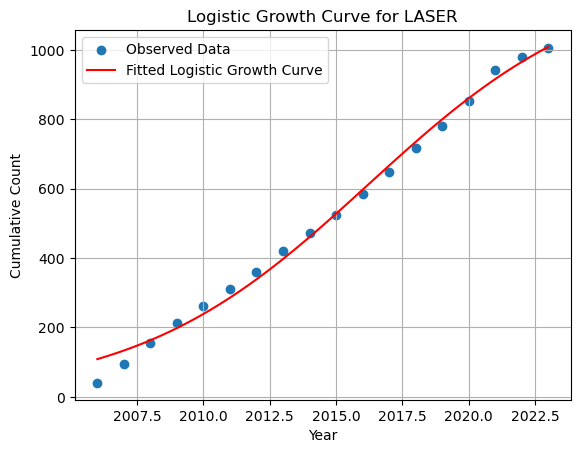

For category 'SPACE': L=1636.1153709537537, k=0.22644424902417037, t0=2017.1462638401606


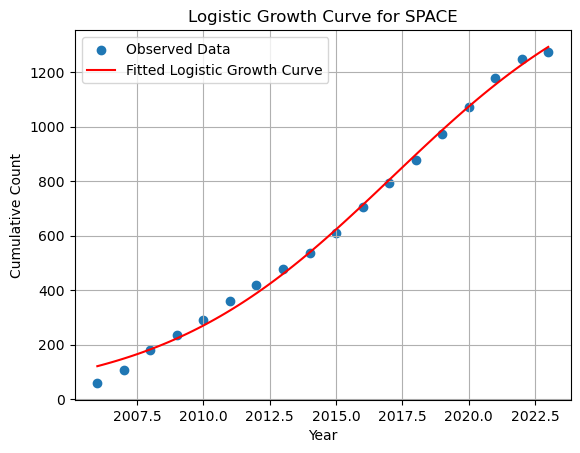

In [19]:
for category, category_data in ts_table.groupby('CATEGORY'):
    # Fit logistic growth function to data
    L, k, t0 = utils.fit_logistic_growth(category_data)
    print(f"For category '{category}': L={L}, k={k}, t0={t0}")
    
    utils.plot_logistic_growth(category_data, L, k, t0, f'Logistic Growth Curve for {category}')